In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


Author: Andre Ofsoski 
ID: 1314669

Load the data

In [3]:
['wisconsin_breast_cancer.csv']

['wisconsin_breast_cancer.csv']

Reads the different rows / titles of the csv file and displays them below

In [4]:
wisconsin = pd.read_csv("../input/wisconsin_breast_cancer.csv")
wisconsin = wisconsin.fillna(0)
print(wisconsin.head())

        id  thickness  size  shape  ...    chromatin  nucleoli  mitosis  class
0  1000025          5     1      1  ...            3         1        1      0
1  1002945          5     4      4  ...            3         2        1      0
2  1015425          3     1      1  ...            3         1        1      0
3  1016277          6     8      8  ...            3         7        1      0
4  1017023          4     1      1  ...            3         1        1      0

[5 rows x 11 columns]


Shows the variables and amount of entries and variable type ie. int64 = integer type

In [5]:
wisconsin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
single       699 non-null int64
nuclei       699 non-null float64
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitosis      699 non-null int64
class        699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


Imports seaborn to plot the data with the hue being the class and colour being a predefined set

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


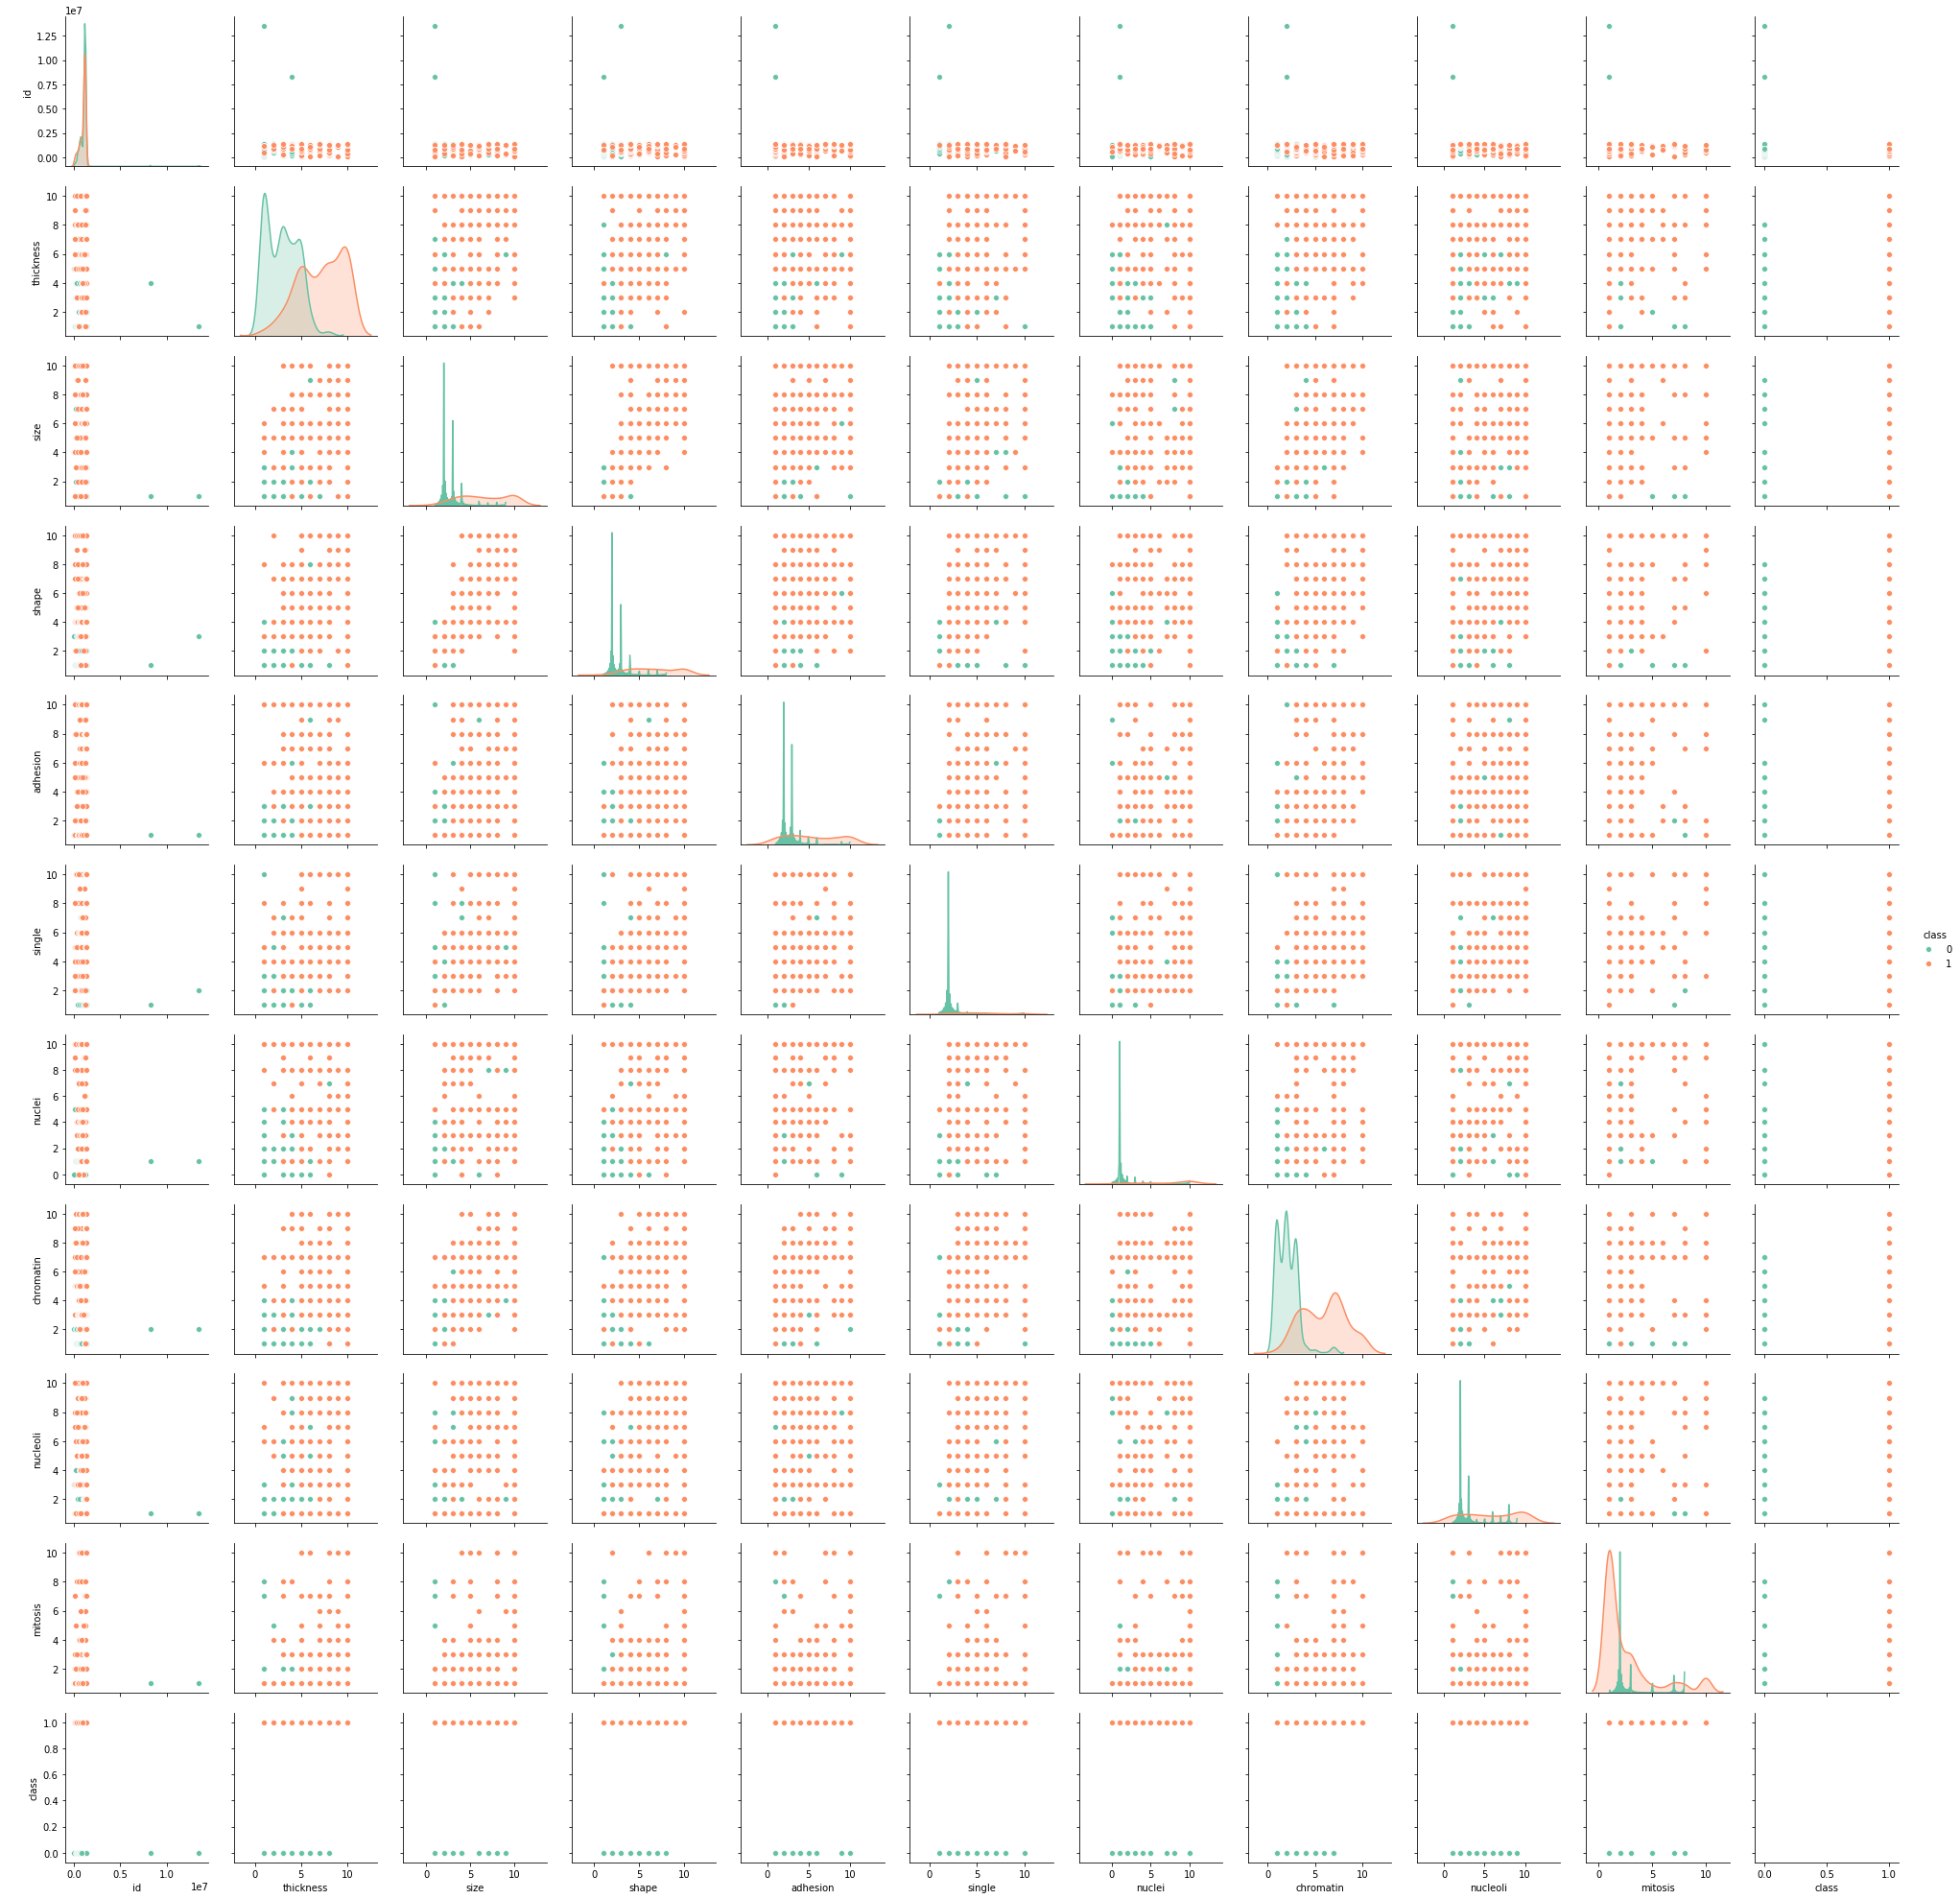

In [7]:
import seaborn as sns
sns.pairplot(data=wisconsin, hue='class', palette='Set2')

Selects all features except for 'ID' and 'Class' as X and selects 'Class' as Y.
Then splits into training and test  with the test size being 20% of original amount. 
Random state is included as a unique seed so that the numbers generated each time wil be the same
Print shape of training x y 

In [8]:
from sklearn.model_selection import train_test_split
x=wisconsin.iloc[:,1:10]
y=wisconsin.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6344786)
print (x_train.shape, y_train.shape)

(559, 9) (559,)


Training an SVC clasifier on the training set

In [9]:
from sklearn.svm import SVC 
model=SVC()
model.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Using train set to predict for test set (limited to 5)

In [13]:
pred = model.predict(x_test)
print(pred[:5])
print(y_test[:5])

[0 0 1 0 0]
643    0
666    0
126    1
153    0
501    0
Name: class, dtype: int64


Apply confusion matrix, it is used to show the performance of the test model compared to the true value of the dataset 

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))


[[89  3]
 [ 0 48]]


Classification report for test set

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        92
           1       0.94      1.00      0.97        48

   micro avg       0.98      0.98      0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



Promising features; thickness, chromatonin, shape, mitosis

 Generate xsubtrain from xtrain from selecting the 4 most promising features as described above. Again ysubtrain is Class. 

In [32]:
from sklearn.model_selection import train_test_split

xsub=wisconsin.iloc[:,[1,3,7,9]]
ysub=wisconsin.iloc[:,-1]

x_subtrain,x_subtest,y_subtrain,y_subtest = train_test_split(xsub,ysub,test_size=0.2,random_state=6344786)
print (x_subtrain.shape, y_subtrain.shape)

(559, 4) (559,)


Same as above generating SVC classifier on xsubtrain

In [33]:
from sklearn.svm import SVC 
subtest=SVC()
subtest.fit(x_subtrain,y_subtrain)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Using trained SVC classifier to predict fro x_subtest

In [34]:
subpred = subtest.predict(x_subtest)
print(pred[:5])
print(y_subtest[:5])
#If layout of the numbers match then prediction accurate

[0 0 1 0 0]
643    0
666    0
126    1
153    0
501    0
Name: class, dtype: int64


Creates a confusion matrix on subtest

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_subtest,pred))

[[89  3]
 [ 0 48]]


Generating a confusion matrix based on subtest   evaluate the accuracy of a classification

In [36]:
print(classification_report(y_subtest,subpred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        92
           1       0.95      0.88      0.91        48

   micro avg       0.94      0.94      0.94       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



The precision for benine classes (class 0) decreased on the subtesting (from 1.0 to 0.94) and the precision for malignant classes increased (from 0.94 to 0.85). This shows that the subtest classified less positive results that were correct for benine classes but showed slightly more positive results on the subtesting for malignant classes. The recall value shows for all instances that were actually positive, what percent was classified correct? The recall for benine class increased in percentage (0.97 to 0.98) and the recall for malignant class decreased (1.0 to 0.0.88), a significant drop in correct classifications. Both f1-scores (the weighted average of Precision and Recall) decreased during the subtest results, benine decreased 0.2 percent and malignant decreased 0.6 percent. So overall the sub-test was less accurate in its results (shown from f1-score), hence why I would say that the original test approach is better, but only slightly.

Original test:
                    precision            recall                f1-score             support

           0       1.00      0.97      0.98        92
           1       0.94      1.00      0.97        48
           
Subtest:
                     
           0       0.94      0.98      0.96        92
           1       0.95      0.88      0.91        48


In [43]:
# with this k-neighbors regression model:
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

model1.fit(x_train,y_train)
#prediciting class values

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Predcition using neighbors classifier model, shows 5 neighbours

In [44]:
predicitionknn2=model1.predict(x_test)
print(predicitionknn2[:5])

[0 0 1 0 0]


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predicitionknn2))
#classification report for predicted knn values

[[90  2]
 [ 6 42]]


Classification report for knn prediciton

In [46]:
print(classification_report(y_test,predicitionknn2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        92
           1       0.95      0.88      0.91        48

   micro avg       0.94      0.94      0.94       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



In [47]:
import sklearn.neighbors
model2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

model2.fit(x_train,y_train)
#prediciting class values

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
predictionknn5=model2.predict(x_test)
print(predictionknn5[:5])

[0 0 1 0 0]


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predictionknn5))

[[90  2]
 [ 1 47]]


In [51]:
print(classification_report(y_test,predictionknn5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.96      0.98      0.97        48

   micro avg       0.98      0.98      0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



Out of all the approaches, I believe the best approach was using the SVC with all features testing in this case. It has resulted in almost perfect results in both classes. It has a 98% accuracy for predicting class 0 results and a 97% accuracy for predicting class 1 results (indicated with f1-score which is the average of precision and recall). The f1 score was the exact same for the KNN with 5 neighbours testing (KNN 5) however, in the SVC with all features data test, precision for benine class was 100% whereas, it was 99% in KNN 5. Also the recall score for malignant class in the SVC testing was 100% whereas only 98% in knn 5 testing.  This means that the computer was slightly more correct in its predictions originally with SVC on all features. Keep in mind if these calculations were performed on a different machine without random states results may vary.